In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels

C:\Users\s9723\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### 讀取空汙資料
讀取並去除NaN欄目

In [2]:
df = pd.read_csv('AQXDaily_20170409211519.csv')
df.head()

,SiteId,SiteName,MonitorDate,PSI,SO2SubIndex,COSubIndex,O3SubIndex,PM10SubIndex,NO2SubIndex
0,83,麥寮,2017-04-08,52,4.0,NaN,NaN,52.0,NaN
1,80,關山,2017-04-08,25,2.0,NaN,25.0,23.0,NaN
2,78,馬公,2017-04-08,27,1.0,2.0,24.0,27.0,NaN
3,77,金門,2017-04-08,24,3.0,2.0,24.0,23.0,NaN
4,75,馬祖,2017-04-08,39,5.0,5.0,37.0,39.0,NaN


In [3]:
df=df.dropna(axis=1,how='all')
df.head()

,SiteId,SiteName,MonitorDate,PSI,SO2SubIndex,COSubIndex,O3SubIndex,PM10SubIndex
0,83,麥寮,2017-04-08,52,4.0,NaN,NaN,52.0
1,80,關山,2017-04-08,25,2.0,NaN,25.0,23.0
2,78,馬公,2017-04-08,27,1.0,2.0,24.0,27.0
3,77,金門,2017-04-08,24,3.0,2.0,24.0,23.0
4,75,馬祖,2017-04-08,39,5.0,5.0,37.0,39.0


將網路上另外載的測站資料合併

In [4]:
metadata = pd.read_csv('AQXSite.csv')

In [5]:
df_new = pd.merge(df, metadata, left_on='SiteName', right_on='SiteName')


### 各測站的空汙情況
該段時間空汙指標平均

In [20]:
meta_mean=df_new.groupby('SiteName').mean()
groupby_site=df_new.groupby('SiteName')
meta_mean

,SiteId,PSI,SO2SubIndex,COSubIndex,O3SubIndex,PM10SubIndex,TWD97Lon,TWD97Lat
SiteName,,,,,,,,
三義,27.0,62.923077,3.307692,4.000000,61.923077,50.769231,120.758833,24.382942
三重,67.0,63.785714,6.142857,20.214286,NaN,63.785714,121.493806,25.072611
中壢,68.0,64.214286,6.714286,16.857143,NaN,64.214286,121.221667,24.953278
中山,12.0,59.461538,4.615385,11.076923,54.461538,52.076923,121.526528,25.062361
二林,35.0,68.153846,5.846154,5.230769,62.769231,65.615385,120.409653,23.925175
仁武,49.0,69.307692,8.461538,5.923077,66.692308,60.846154,120.332631,22.689056
冬山,66.0,53.714286,2.642857,4.714286,50.285714,48.357143,121.792928,24.632203
前金,56.0,69.692308,7.615385,6.076923,67.153846,59.769231,120.288086,22.632567
前鎮,57.0,58.000000,8.384615,NaN,NaN,58.000000,120.307564,22.605386


測站地理分布與PSI指標 可注意到桃園與中南部空汙較嚴重

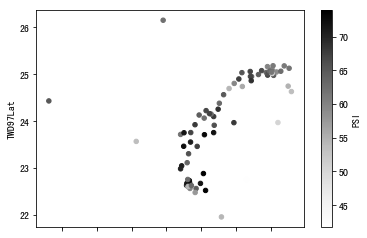

In [7]:
meta_mean.plot.scatter('TWD97Lon','TWD97Lat',c='PSI')

### 空汙指標關聯分析
用seaborn中的功能 將指標兩兩配對作圖並進行線性回歸
<br> PSI和O3及PM10的關聯很明顯 是因PSI是由四個subindex中選出最高的 通常就是O3及PM10

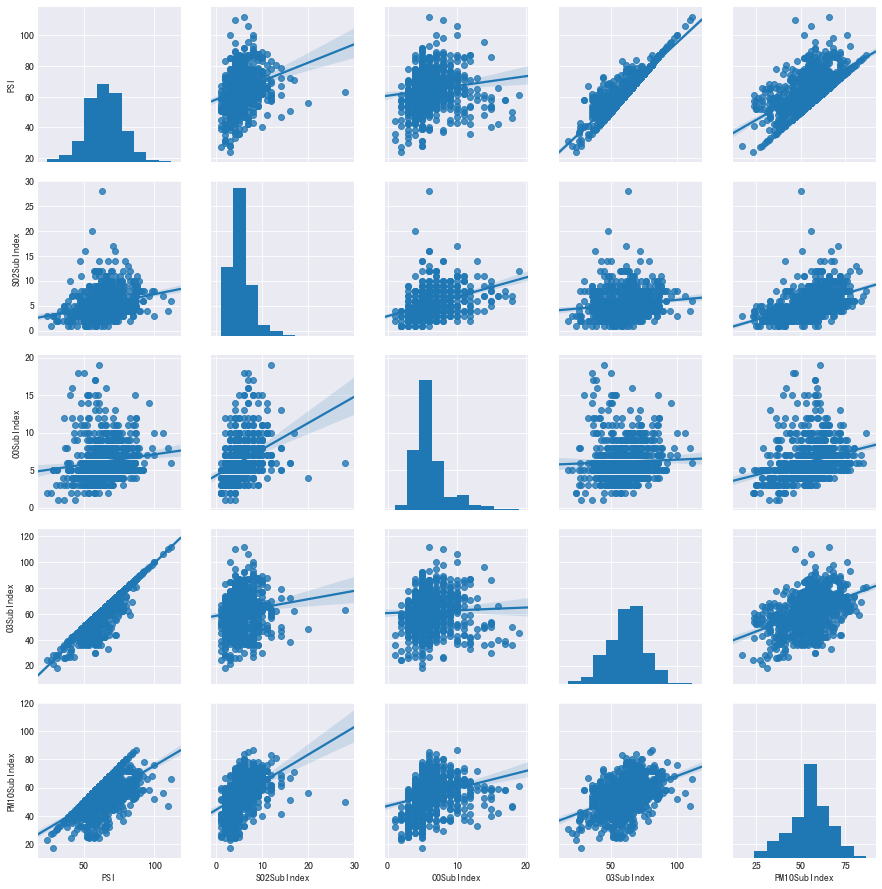

In [9]:
import seaborn as sns
sns.set_style("darkgrid",{"font.sans-serif":['SimHei', 'Arial']})
sns.pairplot(df.dropna(), vars=['PSI', 'SO2SubIndex','COSubIndex','O3SubIndex','PM10SubIndex'], kind='reg')

加上不同顏色 代表各測站資料

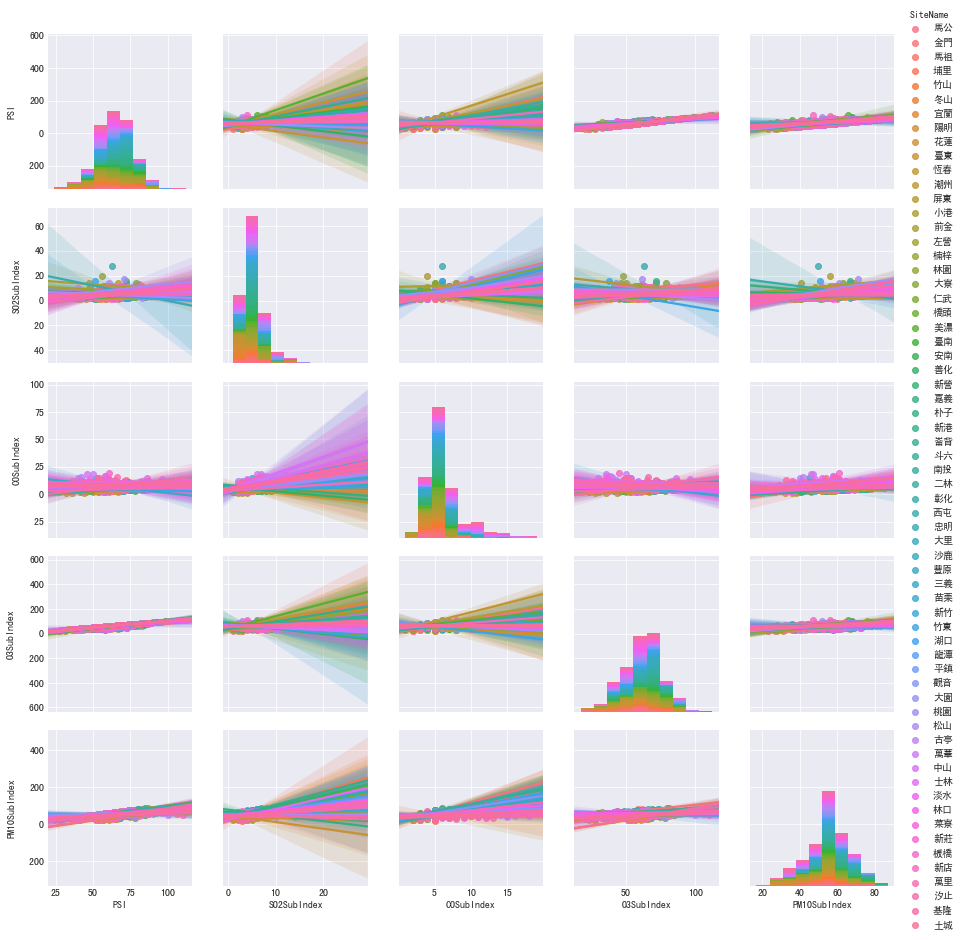

In [11]:
sns.pairplot(df.dropna(), vars=['PSI', 'SO2SubIndex','COSubIndex','O3SubIndex','PM10SubIndex'], kind='reg',hue='SiteName')


In [12]:
from statsmodels.formula.api import ols


O3與PM10SubIndex 線性回歸分析

In [13]:
model = ols("O3SubIndex ~ PM10SubIndex", df).fit()

In [14]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             O3SubIndex   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     219.7
Date:                Tue, 05 Jun 2018   Prob (F-statistic):           2.61e-44
Time:                        21:04:49   Log-Likelihood:                -3323.6
No. Observations:                 840   AIC:                             6651.
Df Residuals:                     838   BIC:                             6661.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       31.4848      2.068     15.223   

PSI與測站地點及各SubIndex的線性回歸

In [24]:
PSImodel = ols("PSI ~ SiteName+PM10SubIndex+SO2SubIndex+COSubIndex+O3SubIndex", df).fit()
print(PSImodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    PSI   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     130.1
Date:                Wed, 06 Jun 2018   Prob (F-statistic):               0.00
Time:                        03:32:58   Log-Likelihood:                -2175.2
No. Observations:                 820   AIC:                             4486.
Df Residuals:                     752   BIC:                             4807.
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.9308      1.276      3.

ANOVA分析 不同測站的測定結果是有顯著差異的

In [18]:
aov_table = statsmodels.stats.anova.anova_lm(PSImodel, typ=2)
print(aov_table)

                    sum_sq     df             F    PR(>F)
SiteName      5.829151e+03   75.0  3.548767e+28  0.000000
PM10SubIndex  8.388687e-27    1.0  3.830253e+00  0.050705
SO2SubIndex   4.894082e-26    1.0  2.234626e+01  0.000003
COSubIndex    1.507174e-26    1.0  6.881718e+00  0.008885
O3SubIndex    9.695895e+04    1.0  4.427121e+31  0.000000
Residual      1.646965e-24  752.0           NaN       NaN


### 鄰近地區空汙分析
選取士林及淡水兩地

In [21]:
pairData=pd.concat([groupby_site.get_group('士林'),groupby_site.get_group('淡水')])

PSI與測站地點及各SubIndex的線性回歸

In [22]:
PSImodel = ols("PSI ~ SiteName+PM10SubIndex+SO2SubIndex+COSubIndex+O3SubIndex", pairData).fit()
print(PSImodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    PSI   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     26.48
Date:                Tue, 05 Jun 2018   Prob (F-statistic):           3.56e-08
Time:                        21:06:59   Log-Likelihood:                -62.043
No. Observations:                  26   AIC:                             136.1
Df Residuals:                      20   BIC:                             143.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         11.3469      4.572      2.

ANOVA分析 地點差異對PSI的影響不顯著

In [23]:
aov_table = statsmodels.stats.anova.anova_lm(PSImodel, typ=2)
print(aov_table)

                  sum_sq    df          F        PR(>F)
SiteName        0.604514   1.0   0.067184  7.981312e-01
PM10SubIndex   43.853921   1.0   4.873796  3.911229e-02
SO2SubIndex    21.977234   1.0   2.442485  1.337743e-01
COSubIndex      0.000892   1.0   0.000099  9.921552e-01
O3SubIndex    552.968473   1.0  61.455289  1.592440e-07
Residual      179.957977  20.0        NaN           NaN
